In [62]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.dates import date2num
import json
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.model_selection import permutation_test_score
from os import listdir
%matplotlib inline

In [63]:
listdir()

['ultimate_data_science_challenge.pdf',
 'logins.json',
 'Untitled.ipynb',
 'ultimate_data_challenge.json',
 '.ipynb_checkpoints']

In [64]:
ultimate_data=pd.read_json('ultimate_data_challenge.json')
login_data=pd.read_json('logins.json')

### Part 1

In [65]:
login_data['count']=1
login_data

login_time  count
0     1970-01-01 20:13:18      1
1     1970-01-01 20:16:10      1
2     1970-01-01 20:16:37      1
3     1970-01-01 20:16:36      1
4     1970-01-01 20:26:21      1
...                   ...    ...
93137 1970-04-13 18:50:19      1
93138 1970-04-13 18:43:56      1
93139 1970-04-13 18:54:02      1
93140 1970-04-13 18:57:38      1
93141 1970-04-13 18:54:23      1

[93142 rows x 2 columns]

In [66]:
login_counts = login_data.groupby(pd.Grouper(key='login_time', freq='900s')).count()
login_counts['day_of_week'] = (pd.DatetimeIndex(login_counts.index).dayofweek)
login_counts['hour'] = (pd.DatetimeIndex(login_counts.index).hour)
login_counts.head()

count  day_of_week  hour
login_time                                   
1970-01-01 20:00:00      2            3    20
1970-01-01 20:15:00      6            3    20
1970-01-01 20:30:00      9            3    20
1970-01-01 20:45:00      7            3    20
1970-01-01 21:00:00      1            3    21

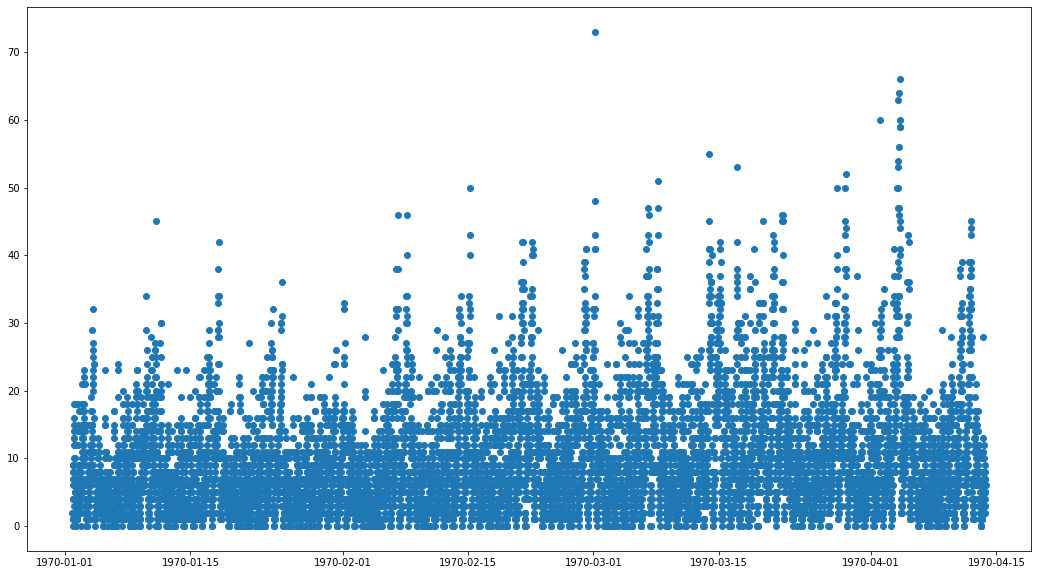

In [67]:
plt.figure(figsize=(18,10))
plt.plot_date(date2num(list(login_counts.index)), login_counts["count"].values)

### Part 2

1)What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?

I would choose weekend engagement of the drivers in the city. There is a big difference in peak times during the weekdays, I don't think that any driver can work in both cities because in both cases he will be working 12 hours.

2)Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:
a. how you will implement the experiment
b. what statistical test(s) you will conduct to verify the significance of the
observation-
c. how you would interpret the results and provide recommendations to the city
operations team along with any caveat

I will perform the experiment by collecting the data of the toll costs reimbursed, time, direction, driver parterns from which city, toll costs. Then I will aggregate and anlalyze the data to find out the trend. If the costs reimbursed and percentage are increasing or not.
I would use a t-test
I will analyzze the visualize the trend to interpret the results.


### Part 3

In [68]:
active_ind = (pd.to_datetime(ultimate_data["last_trip_date"]) < pd.to_datetime(max(ultimate_data["last_trip_date"])) - pd.Timedelta("30 days")) + 0
active_ind

0        0
1        1
2        1
3        0
4        1
        ..
49995    0
49996    1
49997    1
49998    1
49999    1
Name: last_trip_date, Length: 50000, dtype: int64

In [69]:
ultimate_data=pd.get_dummies(ultimate_data)

In [70]:
ultimate_data

trips_in_first_30_days  avg_rating_of_driver  avg_surge  surge_pct  \
0                           4                   4.7       1.10       15.4   
1                           0                   5.0       1.00        0.0   
2                           3                   4.3       1.00        0.0   
3                           9                   4.6       1.14       20.0   
4                          14                   4.4       1.19       11.8   
...                       ...                   ...        ...        ...   
49995                       0                   5.0       1.00        0.0   
49996                       1                   NaN       1.00        0.0   
49997                       0                   5.0       1.00        0.0   
49998                       2                   3.0       1.00        0.0   
49999                       0                   NaN       1.00        0.0   

       ultimate_black_user  weekday_pct  avg_dist  avg_rating_by_driver  \
0                     True         46.2      3.67                   5.0   
1                    False         50.0      8.26                   5.0   
2                    False        100.0      0.77                   5.0   
3                     True         80.0      2.36                   4.9   
4                    False         82.4      3.13                   4.9   
...                    ...          ...       ...                   ...   
49995                False        100.0      5.63                   4.2   
49996                False          0.0      0.00                   4.0   
49997                 True        100.0      3.86                   5.0   
49998                False        100.0      4.58                   3.5   
49999                False          0.0      3.49                   5.0   

       city_Astapor  city_King's Landing  ...  last_trip_date_2014-06-24  \
0                 0                    1  ...                          0   
1                 1                    0  ...                          0   
2                 1                    0  ...                          0   
3                 0                    1  ...                          0   
4                 0                    0  ...                          0   
...             ...                  ...  ...                        ...   
49995             0                    1  ...                          0   
49996             1                    0  ...                          0   
49997             0                    0  ...                          0   
49998             1                    0  ...                          0   
49999             1                    0  ...                          0   

       last_trip_date_2014-06-25  last_trip_date_2014-06-26  \
0                              0                          0   
1                              0                          0   
2                              0                          0   
3                              0                          0   
4                              0                          0   
...                          ...                        ...   
49995                          0                          0   
49996                          0                          0   
49997                          0                          0   
49998                          0                          0   
49999                          0                          0   

       last_trip_date_2014-06-27  last_trip_date_2014-06-28  \
0                              0                          0   
1                              0                          0   
2                              0                          0   
3                              0                          0   
4                              0                          0   
...                          ...                        ...   
49995                          0                          0   
49996  

In [71]:
ultimate_data=ultimate_data.fillna(-1)

I filled the null values with -1 and I converted the categorical attributes to one hot encoding vectors using get_dummies.

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [73]:
X_train, X_test, y_train, y_test = train_test_split(ultimate_data, active_ind, test_size=0.33, random_state=42)

In [74]:
clf=GradientBoostingClassifier()
clf.fit(X_train,y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [75]:
y_pred=clf.predict(X_test)
accuracy_score(y_test,y_pred)

0.9750909090909091

In this part, I used the active users who have been active since the last month. Any users who have not taken a trip last month means they are not active from 6 months. I used graodient boosting classifier to predict the active user status.  

I started with converting the data to one hot encoding using pandas get_dummies method.
Then I split the data into train and test sets.
then I trained the classifier using the train sets I created.

Testing on the unseen test data, classifier retured 97% accuracy. which is pretty good.